In [1]:
from langchain.llms import OpenAI
from dotenv import load_dotenv
import os 

load_dotenv()
llm = OpenAI(
    openai_api_key=os.environ["OPENAI_API_KEY"],
)

result = llm("Write a very very short poem")
print(result)

/Users/babyching/Documents/personal/LLM/llm_pdf/.venv/lib/python3.12/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.llms.openai.OpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAI`.
  warn_deprecated(
/Users/babyching/Documents/personal/LLM/llm_pdf/.venv/lib/python3.12/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




Words like raindrops
Falling from the sky
Each one unique
But together they fly
Creating a story
That will never die


# Chain
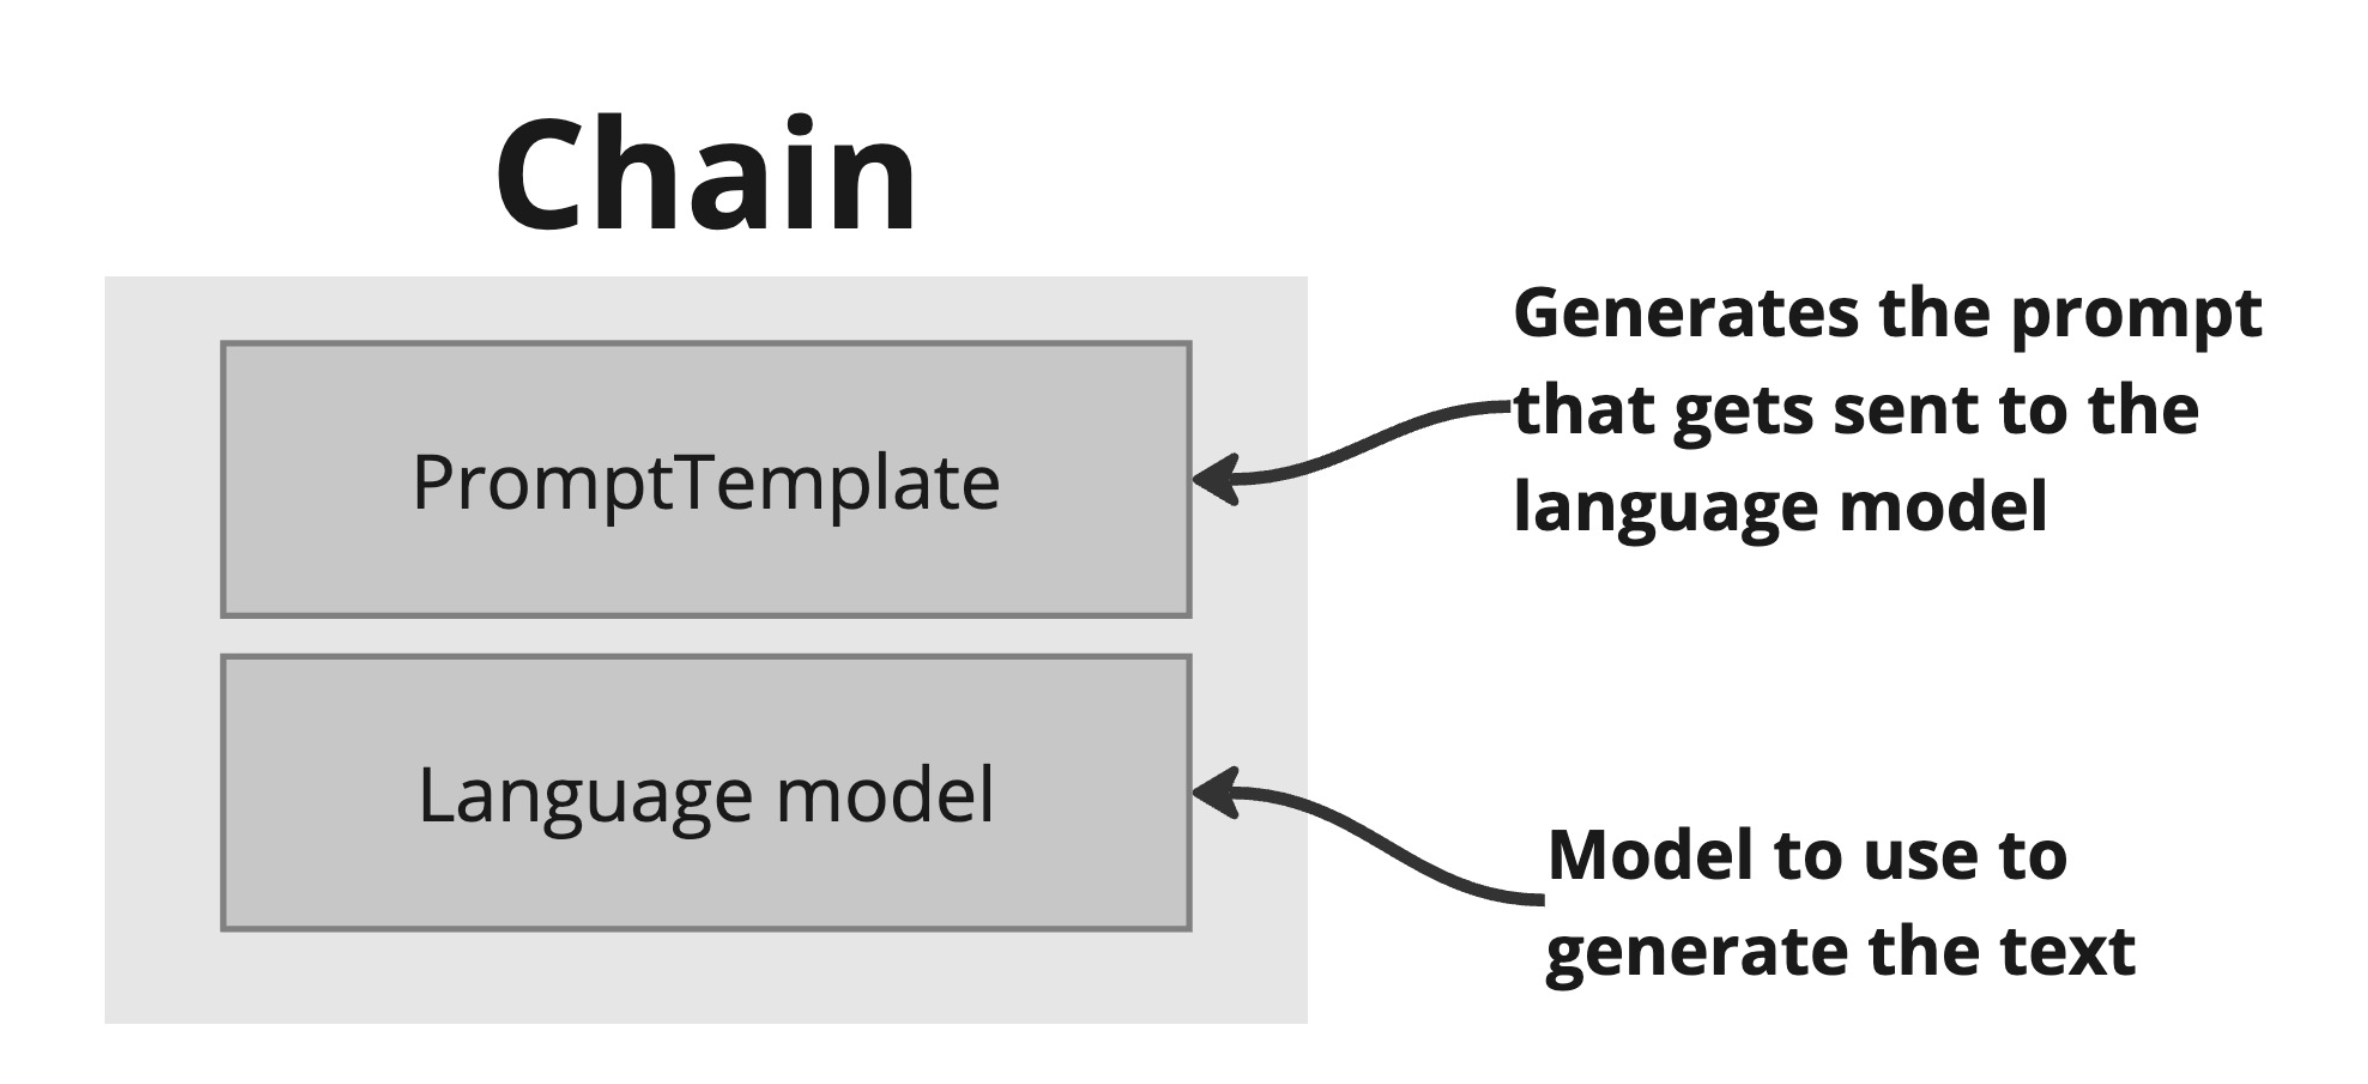

In [4]:
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from dotenv import load_dotenv, find_dotenv
import os 

llm = OpenAI(
    openai_api_key=os.environ["OPENAI_API_KEY"],
)

code_prompt = PromptTemplate(
    template = "Write a very short {language} function that will {task}",
    input_variables=["language", "task"]
)

code_chain = LLMChain(
    llm=llm,
    prompt=code_prompt
)

result=code_chain({
    "language": "python",
    "task": "return a list of numbers"
})

print(result["text"])



def get_numbers():
    return [1, 2, 3, 4, 5]


In [6]:
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from dotenv import load_dotenv, find_dotenv
import os 

def generate_code(task="return a list of numbers", language="python"):
    llm = OpenAI(
        openai_api_key=os.environ["OPENAI_API_KEY"],
    )
    
    code_prompt = PromptTemplate(
        template = "Write a very short {language} function that will {task}",
        input_variables=["language", "task"]
    )
    
    code_chain = LLMChain(
        llm=llm,
        prompt=code_prompt
    )
    
    result = code_chain({
        "language": language,
        "task": task
    })
    
    return result["text"]

print(generate_code(task="print hello", language="javascript"))



function printHello() {
  console.log("Hello")
}

printHello();


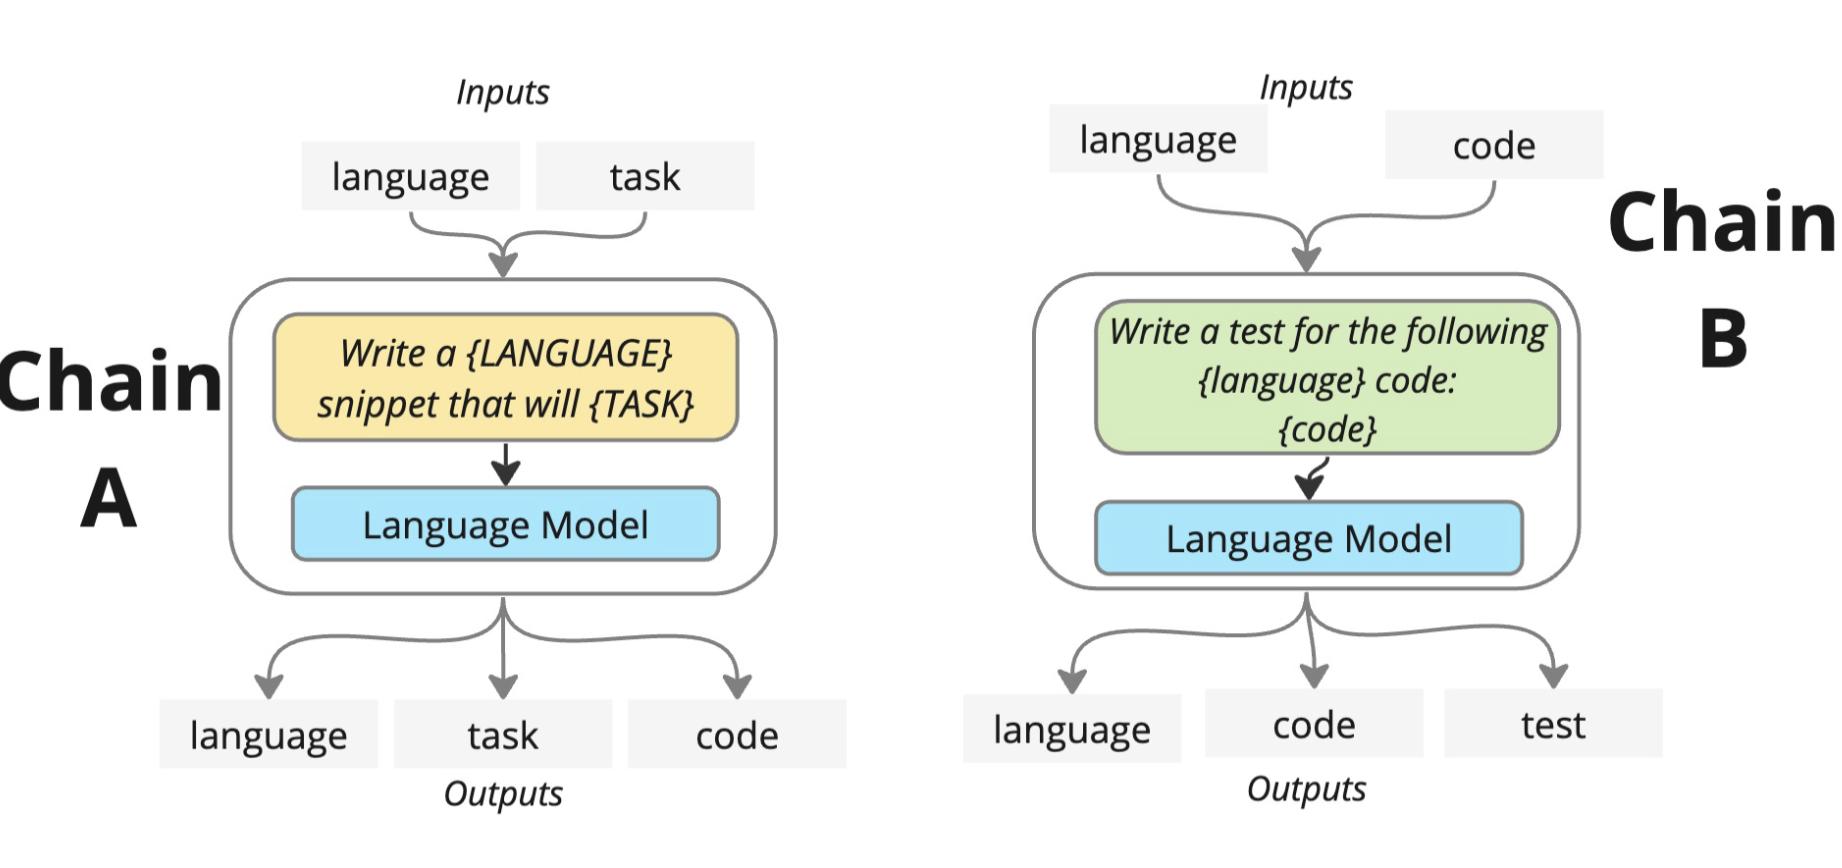

In [2]:
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain, SequentialChain
from dotenv import load_dotenv, find_dotenv
import os 

def generate_code(task="return a list of numbers", language="python"):
    llm = OpenAI(
        openai_api_key=os.environ["OPENAI_API_KEY"],
    )
    
    code_prompt = PromptTemplate(
        template = "Write a very short {language} function that will {task}",
        input_variables=["language", "task"]
    )

    test_prompt = PromptTemplate(
        template = "Write a test for the following {language} code:\n {code}",
        input_variables=["language", "code"]
    )
    
    code_chain = LLMChain(
        llm=llm,
        prompt=code_prompt,
        output_key="code"
    )

    test_chain = LLMChain(
        llm=llm,
        prompt=test_prompt,
        output_key="test"
    )

    chain = SequentialChain(
        chains=[code_chain, test_chain],
        input_variables=["task","language"],
        output_variables=["test","code"]
    )
    
    result = chain({
        "language": language,
        "task": task
    })
    
    print(">>>>>>>>>> GENERATED CODE:")
    print(result["code"])
    print(">>>>>>>>>>  GENERATED TEST:")
    print(result["test"])
    return 

generate_code(task="return a list of numbers", language="python")

>>>>>>>>>> GENERATED CODE:


def get_numbers():
    return [1, 2, 3, 4, 5]
>>>>>>>>>>  GENERATED TEST:


Test for get_numbers():
1. Create a test function to test the output of get_numbers():
    def test_get_numbers():
        pass

2. Import the get_numbers function from the python code:
    from file_name import get_numbers

3. Call the get_numbers function and store the output in a variable:
    numbers = get_numbers()

4. Use the assert statement to check if the output is a list:
    assert type(numbers) == list

5. Use the assert statement to check if the output contains the expected numbers:
    assert numbers == [1, 2, 3, 4, 5]

6. Use the assert statement to check if the output has the correct length:
    assert len(numbers) == 5

7. Use the assert statement to check if the output is in ascending order:
    assert numbers == sorted(numbers)

8. Run the test function:
    test_get_numbers()

If all the assert statements pass, the test will be successful and the code is working 